# SVM algorithm using scikit-learn library

## Basic SVM With sklern

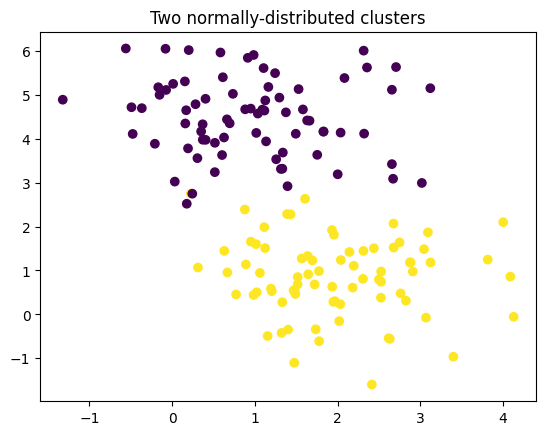

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, cluster_std=0.9, random_state=0, n_samples=150)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Two normally-distributed clusters")
plt.show()

### SVM From SK-Lern

In [24]:
import sklearn.svm as svm
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)
print(model)

SVC(kernel='linear')


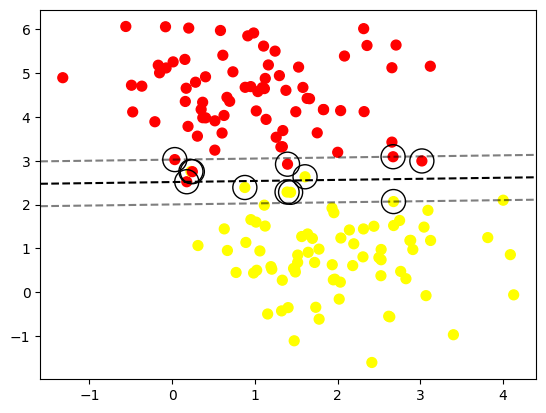

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[0], alpha=1, linestyles='--')
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 1], alpha=0.5, linestyles='--')
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

### Self Made SVM

In [29]:
class SVM:
    def __init__(self, lr=1e-2, reg=1e-2, epochs=100, batch_size=32, random_state=None, verbose=False):
        self.lr = lr
        self.reg = reg
        self.epochs = epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self.verbose = verbose
        self.W = None
        self.b = 0.0

    @staticmethod
    def _ensure_labels_pm1(y):
        y = np.asarray(y).reshape(-1)
        if set(np.unique(y)).issubset({0, 1}):
            y = np.where(y == 1, 1, -1)
        return y.astype(float)

    def _loss_with_params(self, X, Y, W, b):
        scores = X.dot(W) + b                    # includes +b (your correction)
        margins = 1.0 - Y * scores
        hinge = np.maximum(0.0, margins)
        data_loss = hinge.mean()
        reg_loss = 0.5 * self.reg * np.sum(W * W)
        return data_loss + reg_loss

    def calculate_loss(self, X, Y):
        """Loss using the model's stored parameters (after training)."""
        if self.W is None:
            raise ValueError("Model weights are not set yet; call fit() first.")
        X = np.asarray(X, dtype=float)
        Y = self._ensure_labels_pm1(Y)
        return self._loss_with_params(X, Y, self.W, self.b)

    def fit(self, X, Y):
        X = np.asarray(X, dtype=float)
        Y = self._ensure_labels_pm1(Y)

        m, n = X.shape
        rng = np.random.default_rng(self.random_state)

        w = np.zeros(n, dtype=float)
        bias = 0.0
        lr = self.lr
        reg = self.reg
        Bsize = self.batch_size

        ids = np.arange(n)

        loss_list = []

        for epoch in range(self.epochs):
            order = rng.permutation(m)
            Xs = X[order]
            Ys = Y[order]

            # iterate over all examples (use m)
            for batch_start in range(0, m, Bsize):
                batch_end = min(batch_start + Bsize, m)
                Xb = Xs[batch_start:batch_end]
                Yb = Ys[batch_start:batch_end]
                B = Xb.shape[0]

                scores = Xb.dot(w) + bias
                margins = 1.0 - Yb * scores
                mask = margins > 0.0

                if np.any(mask):
                    gradw_data = -(Xb[mask].T @ Yb[mask]) / B
                    gradb_data = -np.sum(Yb[mask]) / B
                else:
                    gradw_data = np.zeros_like(w)
                    gradb_data = 0.0

                w[ids] = w[ids] - lr * reg * w[ids] + lr * gradw_data[ids]
                bias = bias + lr * gradb_data

            loss = self._loss_with_params(X, Y, w, bias)
            loss_list.append(loss)
            if self.verbose and (epoch % max(1, self.epochs // 10) == 0 or epoch == self.epochs - 1):
                print(f"epoch {epoch+1}/{self.epochs}  loss={loss:.6f}")

        self.W = w
        self.b = bias

        return w, bias, loss_list

    def decision_function(self, X):
        X = np.asarray(X, dtype=float)
        if self.W is None:
            raise ValueError("Model not trained yet; call fit() first.")
        return X.dot(self.W) + self.b

    def predict(self, X):
        return np.where(self.decision_function(X) >= 0.0, 1, -1)

In [31]:
mysvm = SVM(lr=0.05, reg=1e-2, epochs=200, batch_size=32, random_state=0, verbose=False)
w, bias, loss_list = mysvm.fit(X, y)
print(w, bias, loss_list[:5], "...")  # show first few losses

[14.50635491 89.37487833] 22.084943181818183 [np.float64(1.8830735330334483), np.float64(2.831852689549342), np.float64(3.9043082655889787), np.float64(5.085696351087546), np.float64(6.363381530111537)] ...


In [33]:
preds = mysvm.predict(X)
print("Train accuracy:", (preds == y).mean())

Train accuracy: 0.4666666666666667


AttributeError: 'SVM' object has no attribute 'support_vectors_'

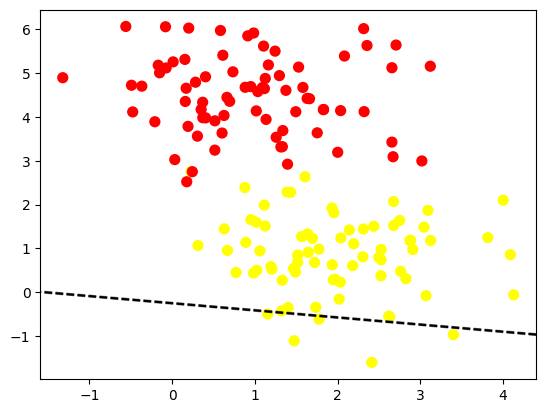

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[0], alpha=1, linestyles='--')
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 1], alpha=0.5, linestyles='--')
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(mysvm)
plt.show()